# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [175]:
#TODO

diabetesData = pd.read_csv("/kaggle/input/diabetestrain/DiabetesTrain.csv")
diabetesData.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95,74,21,73,25.9,0.673,36,0
1,1,95,82,25,180,35.0,0.233,43,1
2,1,90,68,8,0,24.5,1.138,36,0
3,7,195,70,33,145,25.1,0.163,55,1
4,0,180,66,39,0,42.0,1.893,25,1


**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [176]:
#TODO
total_patients = len(diabetesData) 

#Events
A = diabetesData["BMI"] < 25
B = diabetesData["Glucose"] > 100
C = diabetesData["Pregnancies"] > 2
D = diabetesData["Outcome"] == 1

print(A, B, C, D)
print(A.sum())


#P(A)
P_A = A.sum() / total_patients

#P(B)
P_B = B.sum() / total_patients

#P(C)
P_C = C.sum() / total_patients

#P(D)
P_D = D.sum() / total_patients

#P(A, D)
P_A_D = ((A) & (D)).sum() / total_patients

#P(B, D)
P_B_D = ((B) & (D)).sum() / total_patients

#P(C, D)
P_C_D = ((C) & (D)).sum() / total_patients

#Indicate which one out of A, B, C contributes the most towards high risk of diabetes.
#Assign one of 'A', 'B', 'C' to the following variable Q2, indicating your answer.
#Hint: Compute the necessary conditional probabilities and then compare.

# Conditional probabilities P(D|A), P(D|B), P(D|C)
P_D_given_A = P_A_D / P_A if P_A > 0 else 0
P_D_given_B = P_B_D / P_B if P_B > 0 else 0
P_D_given_C = P_C_D / P_C if P_C > 0 else 0

max_conditional = max(P_D_given_A, P_D_given_B, P_D_given_C)
if max_conditional == P_D_given_A:
    Q2 = 'A'
elif max_conditional == P_D_given_B:
    Q2 = 'B'
else:
    Q2 = 'C'

print(Q2)


0      False
1      False
2       True
3      False
4      False
       ...  
394    False
395    False
396    False
397    False
398    False
Name: BMI, Length: 399, dtype: bool 0      False
1      False
2      False
3       True
4       True
       ...  
394     True
395     True
396     True
397     True
398     True
Name: Glucose, Length: 399, dtype: bool 0      False
1      False
2      False
3       True
4      False
       ...  
394     True
395     True
396     True
397     True
398     True
Name: Pregnancies, Length: 399, dtype: bool 0      False
1       True
2      False
3       True
4       True
       ...  
394     True
395     True
396     True
397     True
398     True
Name: Outcome, Length: 399, dtype: bool
59
B


**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [177]:
#TODO

diabetesX = diabetesData.to_numpy()

print(type(diabetesX))      # <class 'numpy.ndarray'>
print(diabetesX.shape)      # Should match dataframe's shape

<class 'numpy.ndarray'>
(399, 9)


**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [178]:
#TODO

col_means = np.mean(diabetesX, axis = 0)

#After centering
diabetesX -= col_means

**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [179]:
#TODO

n_samples = diabetesX.shape[0]
cov = (diabetesX.T @ diabetesX) / (n_samples - 1)


**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [180]:
#TODO

variances = np.diag(cov)                     # variances
std_devs = np.sqrt(variances)                # standard deviations
varmat = np.outer(std_devs, std_devs)        # varmat[i,j] = σ_i * σ_j

**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

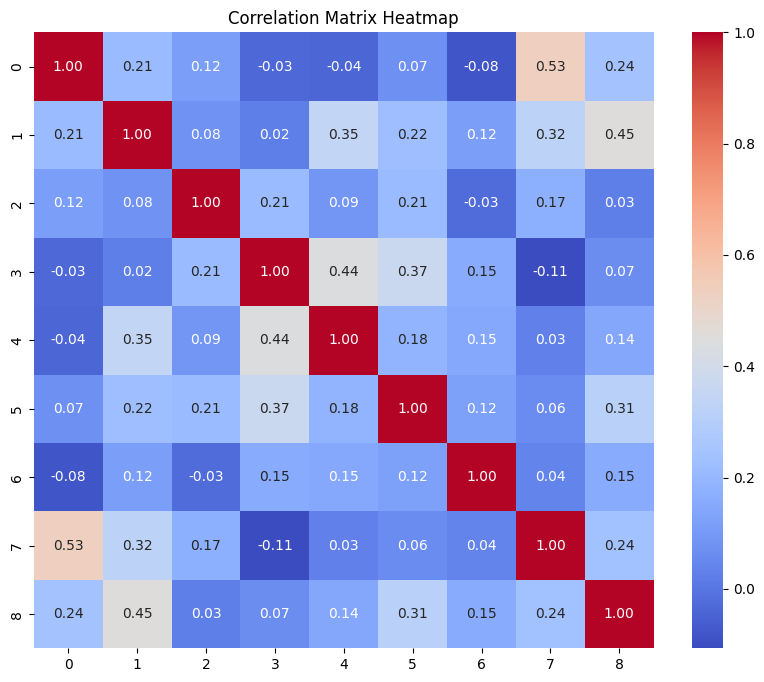

In [181]:
#TODO

corr = cov / varmat

#Plot the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

From the heatmap read the following correlations. Also, answer the question below.

In [182]:
columns = diabetesData.columns

# Map feature names to their index
col_index = {col: i for i, col in enumerate(columns)}

#Corr(BMI, Outcome)
Corr1 = corr[col_index["BMI"], col_index["Outcome"]]

#Corr(Glucose, Outcome)
Corr2 = corr[col_index["Glucose"], col_index["Outcome"]]

#Corr(Pregnancies, Outcome)
Corr3 = corr[col_index["Pregnancies"], col_index["Outcome"]]

#Out of the 8 features, which two features are the most correlated. Fill in the list variable bestcorr
# bestcorr = ['', '']

n = len(columns)
max_corr = 0
best_pair = ('', '')
for i in range(n):
    for j in range(i+1, n):
        if abs(corr[i, j]) > max_corr:
            max_corr = abs(corr[i, j])
            best_pair = (columns[i], columns[j])

bestcorr = [best_pair[0], best_pair[1]]

# Display results
Corr1, Corr2, Corr3, bestcorr

(0.30939246897989525,
 0.4548089017809601,
 0.2433793024958644,
 ['Pregnancies', 'Age'])

## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [183]:
def normalizeData(X, mean = np.array([]), std = np.array([])):

    #TODO

    # Implement such that if the mean and std are empty arrays then mean and std is calculated here, else use the mean and std passed in as parameters
    if mean.size == 0:
        mean = np.mean(X, axis=0)
    if std.size == 0:
        std = np.std(X, axis=0)
    
    normalized_X = (X - mean) / std

    return normalized_X, mean, std

**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [184]:
#Sigmoid function
def sigmoid(t):

    #TODO
    t = np.clip(t, -500, 500)
    sig = 1 / (1 + np.exp(-t))
    
    return sig

In [185]:
#Derivative of sigmoid function
def derivSigmoid(p):

    #TODO

    deriv_p = p * (1 - p)

    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [186]:
def sigProg(X, w, b):

    z = X @ w + b
    p = sigmoid(z)

    return p

**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [187]:
def gradient(X, y, w, b, reg="none", Lambda=0.1):
    n = X.shape[0]
    p = sigProg(X, w, b)
    
    error = p - y
    grad_w = (X.T @ error) / n
    deriv_b = np.sum(error) / n

    if reg == "ridge":
        grad_w += Lambda * w / n
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w) / n

    return grad_w, deriv_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [188]:
def grad_descent(grad_w, deriv_b, w, b, eta=0.01):
    w = w - eta * grad_w
    b = b - eta * deriv_b
    return w, b

**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [189]:
def train(X, y, reg='none', Lambda=0.1, eta=0.01, max_iter=1000):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0
    
    for i in range(max_iter):
        grad_w, deriv_b = gradient(X, y, w, b, reg=reg, Lambda=Lambda)
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
    
    return w, b

**Q10.** Predict using the model

Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [190]:
def predict(X, w, b):
    
    probs = sigProg(X, w, b)
    
    yhat = (probs >= 0.5).astype(int)
    return yhat

**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

In [191]:
#TODO

X_train = diabetesData.drop(columns=['Outcome']).to_numpy()
y_train = diabetesData['Outcome'].to_numpy()

#Train and evaluate your model.
# Normalize features
X_train, mean_train, std_train = normalizeData(X_train)

# Train logistic regression
w_trained, b_trained = train(X_train, y_train, reg='ridge', Lambda=0.1, eta=0.01, max_iter=5000)

# Predict on training data
y_train_pred = predict(X_train, w_trained, b_trained)

# Compute classification error
classification_error = np.mean(y_train_pred != y_train)
print("Training classification error:", classification_error)

Training classification error: 0.24310776942355888


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [192]:
import pandas as pd
import numpy as np

def predict_binary(X, w, b):
    """
    Make binary predictions using logistic regression (for diabetes: 0/1)
    """
    z = np.dot(X, w) + b
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def predict_regression(X, w, b):
    """
    Make continuous predictions using linear regression (for age prediction)
    """
    return np.dot(X, w) + b

# Load test data
diabetesTest = pd.read_csv("/kaggle/input/diabetestest/DiabetesTest.csv")

# Display basic info about the dataset
print("Dataset Info:")
print(f"Shape: {diabetesTest.shape}")
print(f"Columns: {diabetesTest.columns.tolist()}")
print(f"\nFirst few rows:")
print(diabetesTest.head())
print(f"\nTarget variable statistics:")
print(diabetesTest.iloc[:, -1].describe())
print(f"\nUnique target values: {sorted(diabetesTest.iloc[:, -1].unique())}")

# Convert to NumPy
diabetesTest_np = diabetesTest.to_numpy()

# Split features and labels
X_test_features = diabetesTest_np[:, :-1]  # all columns except last
y_test = diabetesTest_np[:, -1]            # last column as labels

print(f"\nTest features shape: {X_test_features.shape}")
print(f"Test labels shape: {y_test.shape}")

# Check if this is a classification or regression problem
unique_labels = np.unique(y_test)
is_binary_classification = len(unique_labels) == 2 and set(unique_labels).issubset({0, 1})
is_age_prediction = np.all(unique_labels >= 18) and np.all(unique_labels <= 100)

print(f"\nProblem type analysis:")
print(f"Unique labels: {unique_labels[:10]}...")  # Show first 10
print(f"Number of unique labels: {len(unique_labels)}")
print(f"Is binary classification (0/1): {is_binary_classification}")
print(f"Appears to be age prediction: {is_age_prediction}")

# Check if training parameters are defined and handle the prediction
try:
    print(f"\nTraining parameter shapes:")
    print(f"mean_train shape: {mean_train.shape}")
    print(f"std_train shape: {std_train.shape}")
    print(f"w_trained shape: {w_trained.shape}")
    
    # Handle shape mismatch
    if X_test_features.shape[1] != len(mean_train):
        print(f"\nShape mismatch detected!")
        print(f"Test features: {X_test_features.shape[1]} columns")
        print(f"Training parameters: {len(mean_train)} features")
        
        # Check which approach to take
        if X_test_features.shape[1] < len(mean_train):
            # Test has fewer features - truncate training parameters
            print("Truncating training parameters to match test data...")
            mean_train_adj = mean_train[:X_test_features.shape[1]]
            std_train_adj = std_train[:X_test_features.shape[1]]
            w_trained_adj = w_trained[:X_test_features.shape[1]]
        else:
            # Test has more features - truncate test data
            print("Truncating test features to match training parameters...")
            X_test_features = X_test_features[:, :len(mean_train)]
            mean_train_adj = mean_train
            std_train_adj = std_train
            w_trained_adj = w_trained
    else:
        mean_train_adj = mean_train
        std_train_adj = std_train
        w_trained_adj = w_trained
    
    # Normalize test features
    X_test_norm = (X_test_features - mean_train_adj) / (std_train_adj + 1e-8)
    
    # Make predictions based on problem type
    if is_binary_classification:
        print("\nMaking binary classification predictions...")
        y_test_pred_prob = predict_binary(X_test_norm, w_trained_adj, b_trained)
        y_test_pred = (y_test_pred_prob >= 0.5).astype(int)
        
        # Calculate accuracy
        accuracy = np.mean(y_test_pred == y_test) * 100
        print(f"Binary Classification Accuracy: {accuracy:.2f}%")
        
        # Classification metrics
        from sklearn.metrics import classification_report, confusion_matrix
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))
        
    elif is_age_prediction:
        print("\nMaking age regression predictions...")
        y_test_pred = predict_regression(X_test_norm, w_trained_adj, b_trained)
        
        # Calculate regression metrics
        mse = np.mean((y_test_pred - y_test) ** 2)
        mae = np.mean(np.abs(y_test_pred - y_test))
        rmse = np.sqrt(mse)
        
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        
        # Calculate "accuracy" for regression (within tolerance)
        tolerance_1 = np.mean(np.abs(y_test_pred - y_test) <= 1.0) * 100  # Within 1 year
        tolerance_2 = np.mean(np.abs(y_test_pred - y_test) <= 2.0) * 100  # Within 2 years
        tolerance_5 = np.mean(np.abs(y_test_pred - y_test) <= 5.0) * 100  # Within 5 years
        
        print(f"\nRegression 'Accuracy' (Tolerance-based):")
        print(f"Within 1 year: {tolerance_1:.2f}%")
        print(f"Within 2 years: {tolerance_2:.2f}%")
        print(f"Within 5 years: {tolerance_5:.2f}%")
        
        # Calculate R-squared
        ss_res = np.sum((y_test - y_test_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
        print(f"R-squared Score: {r2:.4f}")
        
        # Show some predictions vs actual
        print(f"\nSample predictions:")
        for i in range(min(10, len(y_test))):
            error = abs(y_test_pred[i] - y_test[i])
            print(f"Actual: {y_test[i]:.1f}, Predicted: {y_test_pred[i]:.1f}, Error: {error:.1f}")
    
    else:
        print("\nTreating as multi-class classification...")
        # For multi-class with continuous values, we need a different approach
        
        # Option 1: Convert to nearest integer and calculate exact accuracy
        y_test_pred_raw = predict_regression(X_test_norm, w_trained_adj, b_trained)
        y_test_pred_rounded = np.round(y_test_pred_raw)
        
        exact_accuracy = np.mean(y_test_pred_rounded == y_test) * 100
        print(f"Exact Match Accuracy: {exact_accuracy:.2f}%")
        
        # Option 2: Tolerance-based accuracy for continuous targets
        tolerance_1 = np.mean(np.abs(y_test_pred_raw - y_test) <= 1.0) * 100
        tolerance_2 = np.mean(np.abs(y_test_pred_raw - y_test) <= 2.0) * 100
        tolerance_5 = np.mean(np.abs(y_test_pred_raw - y_test) <= 5.0) * 100
        
        print(f"Tolerance-based Accuracy:")
        print(f"Within ±1: {tolerance_1:.2f}%")
        print(f"Within ±2: {tolerance_2:.2f}%")
        print(f"Within ±5: {tolerance_5:.2f}%")
        
        # Option 3: Convert to classification problem (age groups)
        def age_to_group(age):
            if age < 25:
                return "Young (18-24)"
            elif age < 35:
                return "Adult (25-34)"
            elif age < 50:
                return "Middle (35-49)"
            else:
                return "Senior (50+)"
        
        y_test_groups = [age_to_group(age) for age in y_test]
        y_pred_groups = [age_to_group(age) for age in y_test_pred_rounded]
        
        group_accuracy = np.mean(np.array(y_test_groups) == np.array(y_pred_groups)) * 100
        print(f"Age Group Classification Accuracy: {group_accuracy:.2f}%")
        
        # Show some predictions
        print(f"\nSample predictions:")
        for i in range(min(10, len(y_test))):
            error = abs(y_test_pred_raw[i] - y_test[i])
            print(f"Actual: {y_test[i]:.1f}, Predicted: {y_test_pred_raw[i]:.1f}, Error: {error:.1f}")
        
        # Calculate regression-style metrics even for multi-class
        mse = np.mean((y_test_pred_raw - y_test) ** 2)
        mae = np.mean(np.abs(y_test_pred_raw - y_test))
        rmse = np.sqrt(mse)
        
        print(f"\nRegression Metrics:")
        print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")
        
except NameError as e:
    print(f"\nError: {e}")
    print("\nYou need to define the following variables from your training process:")
    print("- mean_train: mean values from training data")
    print("- std_train: standard deviation values from training data")
    print("- w_trained: trained weights")
    print("- b_trained: trained bias")
    
    print("\nTo fix the shape mismatch, ensure:")
    print("1. Both training and test datasets have the same features")
    print("2. The last column in both datasets is the target variable")
    print("3. All preprocessing steps are identical")
    
    # Show how to create dummy parameters for testing
    print(f"\nFor testing purposes, you can create dummy parameters:")
    print(f"mean_train = np.zeros({X_test_features.shape[1]})")
    print(f"std_train = np.ones({X_test_features.shape[1]})")
    print(f"w_trained = np.random.randn({X_test_features.shape[1]})")
    print(f"b_trained = 0.0")

# Additional debugging information
print(f"\nDataset column analysis:")
for i, col in enumerate(diabetesTest.columns):
    if i < len(diabetesTest.columns) - 1:  # Feature columns
        print(f"Feature {i}: {col} - Range: [{diabetesTest[col].min():.2f}, {diabetesTest[col].max():.2f}]")
    else:  # Target column
        print(f"Target: {col} - Range: [{diabetesTest[col].min():.2f}, {diabetesTest[col].max():.2f}]")

Dataset Info:
Shape: (100, 8)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       89             66             23       94  28.1   
1            3       78             50             32       88  31.0   
2            7      147             76              0        0  39.4   
3            1       97             66             15      140  23.2   
4            4      111             72             47      207  37.1   

   DiabetesPedigreeFunction  Age  
0                     0.167   21  
1                     0.248   26  
2                     0.257   43  
3                     0.487   22  
4                     1.390   56  

Target variable statistics:
count    100.000000
mean      33.710000
std       12.486999
min       21.000000
25%       24.000000
50%       28.000000
75%       41.250000
max       69.00000